<div align=left style="width: 200; height: 80px; overflow: hidden">
    <img src=http://static1.squarespace.com/static/571446ff60b5e92c3a2b4249/57d8a40b9de4bb459f731cf3/58cb2f229de4bb4a049d38c2/1505340359463/teselaGenlogo.jpg align=right width=200>
</div>

# Hello World! DESIGN Module

This notebook shows how to use the TG's Python API Client to interact with the DESIGN module.

We start by making some imports

In [1]:
import platform
from pathlib import Path

import pandas as pd
from IPython.core.display import display, HTML
import nglview

from teselagen.api import TeselaGenClient
from teselagen.utils.plot_tools import plot_plasmid_features, RenderJSON

print(f"python version     : {platform.python_version()}")
print(f"pandas version     : {pd.__version__}")

python version     : 3.6.9
pandas version     : 1.1.5


And then login into the platform. You should get "*Connection Accepted*" printed below. 

In [2]:
# Connect to your teselagen instance by passing it as the 'host_url' argument of TeselaGenClient(host_url=host_url)
# client = TeselaGenClient(host_url="https://your-instance-name.teselagen.com")
client = TeselaGenClient()
client.login()
client.select_laboratory(lab_name="The Test Lab")

Connection Accepted
Selected Lab: The Test Lab


In [3]:
print(client.host_url)

https://platform.teselagen.com


## Downloading DNA sequences

Now we will import the DNA sequences named GFP_UV

In [4]:
sequence = client.design.get_dna_sequences(name='GFP_UV')[0]
RenderJSON(sequence)

The output contained  a list of all sequences named `'GFP_UV'`. We just got the first one and now we check the   features it contains

In [5]:
features = sequence['features']
for feat in features:
    print(feat['name'])

pSC101**
araC
GFPuv
RBS
CmR
signal_peptide
XhoI_silent_mutation
pBAD promoter
Operator I2 and I1
operator O1
T0
CAP site
araC promoter
dbl term
BamHI_silent_mutation
operator O2


Each element contains all the information about that particular feature. In the following cell we show the contents of the `GFPuv` feature:

In [6]:
gfp_uv_feature = [feat for feat in features if feat['name']=="GFPuv"][0]
display(gfp_uv_feature)

{'notes': [],
 'id': '3688073',
 'start': 1235,
 'end': 2017,
 'type': 'CDS',
 'name': 'GFPuv',
 'strand': 1,
 'locations': None,
 '__typename': 'sequenceFeature',
 'annotationTypePlural': 'features',
 'forward': True,
 'color': '#EF6500'}

We can use the above object to get the precise amino acid sequence for that feature:

In [7]:
sequence['sequence'][int(gfp_uv_feature['start']):int(gfp_uv_feature['end'])+1]

'ATGAGTAAAGGAGAAGAACTTTTCACTGGAGTTGTCCCAATTCTTGTTGAATTAGATGGTGATGTTAATGGGCACAAATTTTCTGTCAGTGGAGAGGGTGAAGGTGATGCAACATACGGAAAACTTACCCTTAAATTTATTTGCACTACTGGAAAACTACCTGTTCCATGGCCAACACTTGTCACTACTTTCTCTTATGGTGTTCAATGCTTTTCCCGTTATCCGGATCATATGAAACGGCATGACTTTTTCAAGAGTGCCATGCCCGAAGGTTATGTACAGGAACGCACTATATCTTTCAAAGATGACGGGAACTACAAGACGCGTGCTGAAGTCAAGTTTGAAGGTGATACCCTTGTTAATCGTATCGAGTTAAAAGGTATTGATTTTAAAGAAGATGGAAACATTCTCGGACACAAACTCGAATACAACTATAACTCACACAATGTATACATCACGGCAGACAAACAAAAGAATGGAATCAAAGCTAACTTCAAAATTCGCCACAACATTGAAGATGGATCTGTTCAACTAGCAGACCATTATCAACAAAATACTCCAATTGGCGATGGCCCTGTCCTTTTACCAGACAACCATTACCTGTCGACACAATCTGCCCTTTCGAAAGATCCCAACGAAAAGCGTGACCACATGGTCCTTCTTGAGTTTGTAACTGCTGCTGGGATTACACATGGCATGGATGAGCTCGGCGGCGGCGGCAGCAAGGTCTACGGCAAGGAACAGTTTTTGCGGATGCGCCAGAGCATGTTCCCCGATCGCTAA'

We can also make a plot of all features by using [dna_features_viewer library](https://github.com/Edinburgh-Genome-Foundry/DnaFeaturesViewer) (see plot_plasmid_features implementation for details). As there are many features we will just focus on the biggest ones (> 100 base pairs)

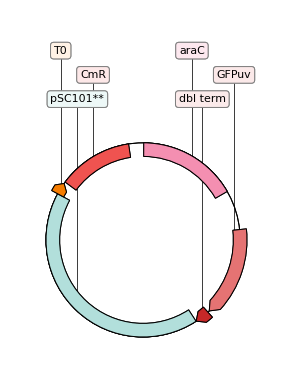

In [8]:
_ = plot_plasmid_features(plasmid_length=len(sequence['sequence']), 
                         features=[feat for feat in features if feat['end']-feat['start']>100])
# This line just centers the image
HTML("""<style> .output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>""")

## Downloading designs

Now we'll download a design from the platform

In [9]:
# We first obtain designs id by its name
design_name = "CGG Design demo notebook"
design_info =client.design.get_designs(name=design_name)[0]

Click the following link to see the design in the platform

In [10]:
design_url = f"{client.host_url}/design/client/designs/{design_info['id']}"
display(HTML(f"""<a href="{design_url}" target="_blank" rel="noopener noreferrer">{design_url}</a>"""))

In [11]:
# Then download design:
design = client.design.get_design(design_info['id'])

You can use the output of the next cell to explore the design object

In [12]:
RenderJSON(design)

For design upload, please refer to the *Closing-the-DBTL-Cycle.ipynb* jupyter notebook.

## Working with amino acid sequences

Below we will explore how to upload and download amino acid secuences with an Antimicrobial Peptide (AMP). For displaying the molecule, the [nglview](https://github.com/nglviewer/nglview) library is being used. If the figure is not showing, try running the following command from your environment terminal and reload: `jupyter-nbextension enable nglview --py --sys-prefix`. If still doesn't work you may want to explore their [FAQ](https://github.com/nglviewer/nglview/blob/master/docs/FAQ.md#widget-not-shown). 

The [2KNJ](https://www.rcsb.org/structure/2KNJ) peptide has AMP properties. Its sequence is: ```HHQELCTKGDDALVTELECIRLRISPETNAAFDNAVQQLNCLNRACAYRKMCATNNLEQAMSVYFTNEQIKEIHDAATACDPEAHHEHDH```

The next cell shows its 3D structure:

In [13]:
# If figure is not shown you
view = nglview.show_pdbid("2KNJ")  # load "2KNJ" from RCSB PDB and display viewer widget
view

NGLWidget()

We can upload the sequence into DESIGN.

If upload works ok, the endpoint will return something like:

```
{'createdAminoAcidSequences': [{'id': '17', 'name': '2KNJ2'}]}
```

However, the current example is already loaded in the default server so, in this case, the endpoint will return a non-empty `existingAminoAcidSequences` field, as occurs when some of the uploaded sequences matches a sequence from the the dataset. 

In [14]:
result = client.design.import_aa_sequences([{
    'AA_NAME': "2KNJ2",
    'AA_SEQUENCE': 'HHQELCTKGDDALVTELECIRLRISPETNAAFDNAVQQLNCLNRACAYRKMCATNNLEQAMSVYFTNEQIKEIHDAATACDPEAHHEHDH'
}])
result

{'existingAminoAcidSequences': [{'id': '17'}]}

Now we'll download the sequence. Amino acid sequence `id` is needed for this:

In [15]:
# The following list contains a list with the uploaded sequence id
ids_list = [int(result['existingAminoAcidSequences'][0]['id'])]
result = client.design.export_aa_sequences(ids_list)


Finally, the downloaded object can be seen below

In [16]:
RenderJSON(result)